**Part III. Advanced Marketing Applications**

**8.Reducing Data Complexity**

**8.1 Consumer Brand Rating Data**

In [1]:
brand.ratings = read.csv("http://goo.gl/IQl8nc")
head(brand.ratings)

perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
2,4,8,8,2,9,7,4,6,a
1,1,4,7,1,1,1,2,2,a
2,3,5,9,2,9,5,1,6,a
1,6,10,8,3,4,5,2,1,a
1,1,5,8,1,9,9,1,1,a
2,8,9,5,3,8,7,1,2,a


In [2]:
tail(brand.ratings)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
995,4,2,8,7,1,3,3,5,2,j
996,2,2,3,6,4,8,5,1,2,j
997,3,2,6,7,1,3,3,2,1,j
998,1,1,10,10,1,6,5,5,2,j
999,1,1,7,5,1,1,2,5,1,j
1000,7,4,7,8,4,1,2,5,1,j


In [3]:
summary(brand.ratings)

    perform           leader           latest            fun        
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 2.000   1st Qu.: 4.000   1st Qu.: 4.000  
 Median : 4.000   Median : 4.000   Median : 7.000   Median : 6.000  
 Mean   : 4.488   Mean   : 4.417   Mean   : 6.195   Mean   : 6.068  
 3rd Qu.: 7.000   3rd Qu.: 6.000   3rd Qu.: 9.000   3rd Qu.: 8.000  
 Max.   :10.000   Max.   :10.000   Max.   :10.000   Max.   :10.000  
                                                                    
    serious          bargain           value            trendy     
 Min.   : 1.000   Min.   : 1.000   Min.   : 1.000   Min.   : 1.00  
 1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 2.000   1st Qu.: 3.00  
 Median : 4.000   Median : 4.000   Median : 4.000   Median : 5.00  
 Mean   : 4.323   Mean   : 4.259   Mean   : 4.337   Mean   : 5.22  
 3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 6.000   3rd Qu.: 7.00  
 Max.   :10.000   Max.   :10.000   Max. 

In [4]:
str(brand.ratings)

'data.frame':	1000 obs. of  10 variables:
 $ perform: int  2 1 2 1 1 2 1 2 2 3 ...
 $ leader : int  4 1 3 6 1 8 1 1 1 1 ...
 $ latest : int  8 4 5 10 5 9 5 7 8 9 ...
 $ fun    : int  8 7 9 8 8 5 7 5 10 8 ...
 $ serious: int  2 1 2 3 1 3 1 2 1 1 ...
 $ bargain: int  9 1 9 4 9 8 5 8 7 3 ...
 $ value  : int  7 1 5 5 9 7 1 7 7 3 ...
 $ trendy : int  4 2 1 2 1 1 1 7 5 4 ...
 $ rebuy  : int  6 2 6 1 1 2 1 1 1 1 ...
 $ brand  : Factor w/ 10 levels "a","b","c","d",..: 1 1 1 1 1 1 1 1 1 1 ...


**8.1.1 Rescaling the Data**

A common procedure is to center each variable by subtracting its mean from every observation, and then rescale those centered values as units of standard deviation. This is commonly called ***standardizing, normalizing,or Z scoring*** the data

In [6]:
x = 1:1000
x.sc = (x-mean(x)) / sd(x)
summary(x.sc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7295 -0.8647  0.0000  0.0000  0.8647  1.7295 

In [7]:
brand.sc = brand.ratings
brand.sc[,1:9] = scale(brand.sc[,1:9])
summary(brand.sc)

    perform            leader            latest             fun          
 Min.   :-1.0888   Min.   :-1.3100   Min.   :-1.6878   Min.   :-1.84677  
 1st Qu.:-1.0888   1st Qu.:-0.9266   1st Qu.:-0.7131   1st Qu.:-0.75358  
 Median :-0.1523   Median :-0.1599   Median : 0.2615   Median :-0.02478  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.7842   3rd Qu.: 0.6069   3rd Qu.: 0.9113   3rd Qu.: 0.70402  
 Max.   : 1.7206   Max.   : 2.1404   Max.   : 1.2362   Max.   : 1.43281  
                                                                         
    serious           bargain             value             trendy        
 Min.   :-1.1961   Min.   :-1.22196   Min.   :-1.3912   Min.   :-1.53897  
 1st Qu.:-0.8362   1st Qu.:-0.84701   1st Qu.:-0.9743   1st Qu.:-0.80960  
 Median :-0.1163   Median :-0.09711   Median :-0.1405   Median :-0.08023  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.6036   3rd Qu.: 0.652

In corrplot(), the argument order="hclust" reorders the rows and columns according to variables’ similarity in a hierarchical cluster solution. The result is shown in Fig, where we see that the ratings seem to group into three clusters of similar variables, a hypothesis we examine in detail in this chapter.

In [9]:
install.packages('corrplot')
library(corrplot)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


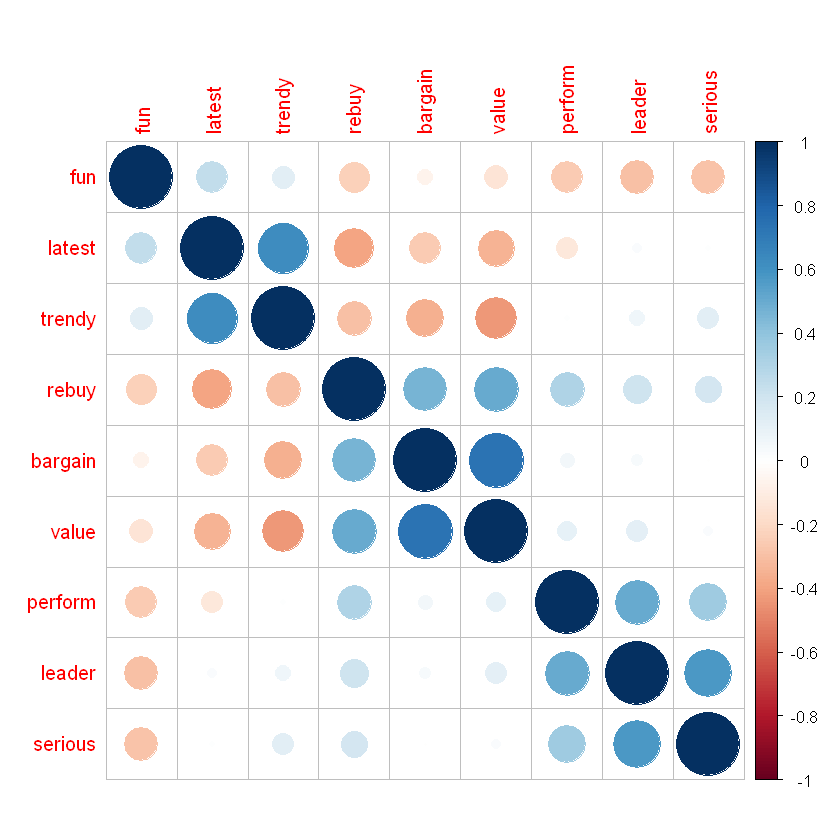

In [13]:
corrplot(cor(brand.sc[,1:9]), order='hclust')

Fig. 8.1. Correlation plot for the simulated consumer brand ratings.
This visualization of the basic data appears to show three general clusters
that comprise *fun/latest/trendy*, *rebuy/bargain/value*, and *perform/leader /serious*, respectively.

**8.1.2 Aggregate Mean Ratings by Brand**

In [21]:
(brand.mean = aggregate(. ~ brand, data=brand.sc, mean))

brand,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603
j,-0.62994504,-0.7885965,-0.1543180,0.2849595,-0.60218870,-0.09711188,-0.07379367,-0.48138267,-0.96164748


In [22]:
rownames(brand.mean) = brand.mean[ ,1]
brand.mean = brand.mean[ ,-1]

In [23]:
brand.mean

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
a,-0.88591874,-0.5279035,0.4109732,0.6566458,-0.91894067,0.21409609,0.18469264,-0.52514473,-0.59616642
b,0.93087022,1.0707584,0.7261069,-0.9722147,1.18314061,0.04161938,0.15133957,0.74030819,0.23697320
c,0.64992347,1.1627677,-0.1023372,-0.8446753,1.22273461,-0.60704302,-0.44067747,0.02552787,-0.13243776
d,-0.67989112,-0.5930767,0.3524948,0.1865719,-0.69217505,-0.88075605,-0.93263529,0.73666135,-0.49398892
e,-0.56439079,0.1928362,0.4564564,0.2958914,0.04211361,0.55155051,0.41816415,0.13857986,0.03654811
f,-0.05868665,0.2695106,-1.2621589,-0.2179102,0.58923066,0.87400696,1.02268859,-0.81324496,1.35699580
g,0.91838369,-0.1675336,-1.2849005,-0.5167168,-0.53379906,0.89650392,1.25616009,-1.27639344,1.36092571
h,-0.01498383,-0.2978802,0.5019396,0.7149495,-0.14145855,-0.73827529,-0.78254646,0.86430070,-0.60402622
i,0.33463879,-0.3208825,0.3557436,0.4124989,-0.14865746,-0.25459062,-0.80339213,0.59078782,-0.20317603
j,-0.62994504,-0.7885965,-0.1543180,0.2849595,-0.60218870,-0.09711188,-0.07379367,-0.48138267,-0.96164748


A *heatmap* is a useful way to examine such results because it colors data points by the intensities of their values. We use *heatmap.2()* from the gplots  package with colors from the RColorBrewer package

In [24]:
install.packages('gplots')
library(gplots)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'gplots' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages



Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [25]:
install.packages('RColorBrewer')
library(RColorBrewer)

Installing package into 'C:/Users/cl44343/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'RColorBrewer' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Temp\RtmpYrBolK\downloaded_packages


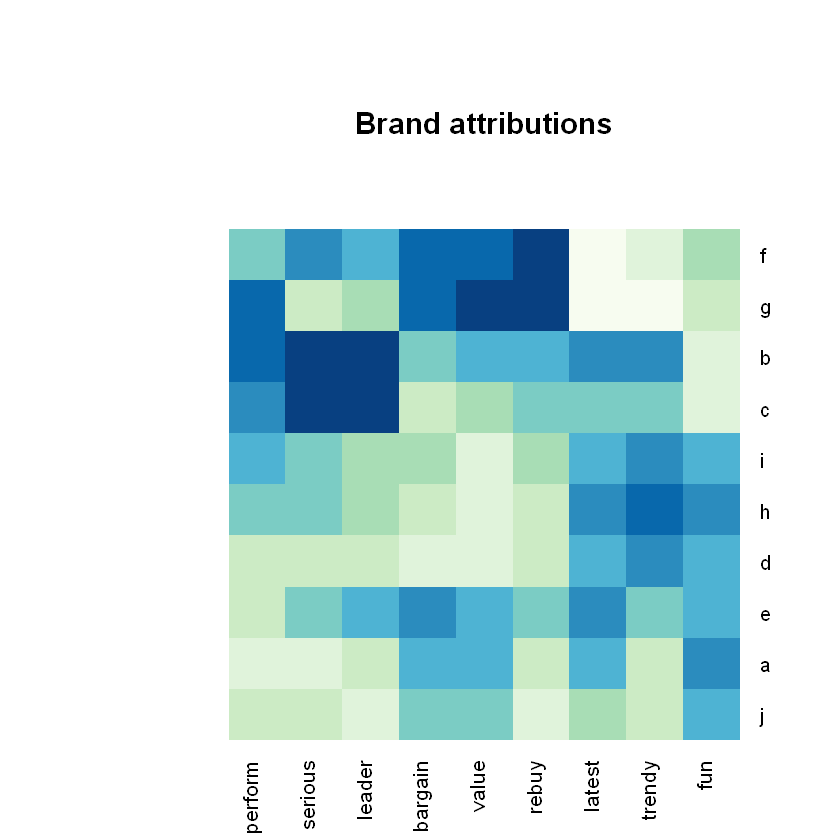

In [27]:
heatmap.2(as.matrix(brand.mean), col=brewer.pal(9, 'GnBu'), trace='none', key=F, dend='none', main='\n\n\n\nBrand attributions')

Fig. 8.2. A heatmap for the mean of each adjective by brand. Brands f and g are similar—with high ratings for rebuy and value but low ratings for latest and fun. Other groups of similar brands are b/c, i/h/d, and a/j.

**8.2 Principal Component Analysis and Perceptual Maps**

**8.2.1 PCA Example**

We explore PCA first with a simple data set to see and develop intuition about what is happening. We create highly correlated data by copying a random vector xvar to a new vector yvar while replacing half of the data points. Then we repeat that procedure to create zvar from yvar

In [30]:
set.seed(98286)
xvar = sample(1:10, 100, replace=T)
yvar = xvar
yvar[sample(1:length(yvar), 50)] = sample(1:10, 50, replace=T)
zvar=yvar
zvar[sample(1:length(zvar),50)]  = sample(1:10, 50, replace=T)
my.vars = cbind(xvar, yvar, zvar)

,xvar,yvar,zvar
xvar,1.0000000,0.5969717,0.2496469
yvar,0.5969717,1.0000000,0.5231468
zvar,0.2496469,0.5231468,1.0000000


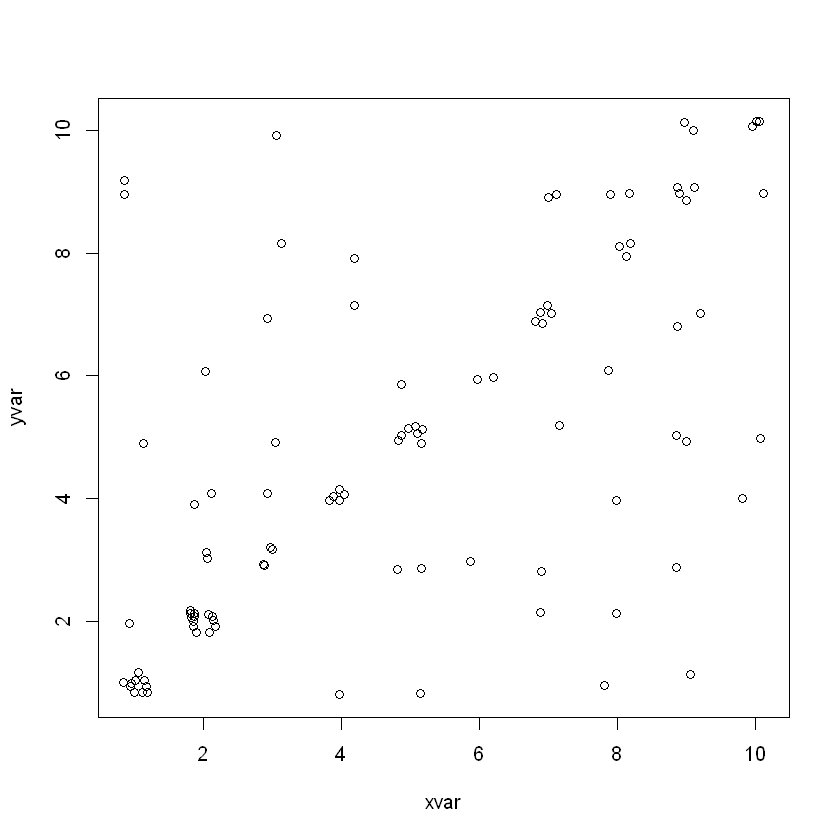

In [33]:
plot(yvar ~ xvar, data=jitter(my.vars))
cor(my.vars)

In [35]:
my.pca = prcomp(my.vars)
summary(my.pca)

Importance of components:
                          PC1    PC2    PC3
Standard deviation     3.9992 2.4381 1.6269
Proportion of Variance 0.6505 0.2418 0.1077
Cumulative Proportion  0.6505 0.8923 1.0000

In [36]:
my.pca

Standard deviations (1, .., p=3):
[1] 3.999154 2.438079 1.626894

Rotation (n x k) = (3 x 3):
            PC1         PC2        PC3
xvar -0.6156755  0.63704774  0.4638037
yvar -0.6532994 -0.08354009 -0.7524766
zvar -0.4406173 -0.76628404  0.4676165

In [37]:
cor(my.pca$x)  # components have zero correlation

,PC1,PC2,PC3
PC1,1.000000e+00,-1.372816e-17,2.445665e-16
PC2,-1.372816e-17,1.000000e+00,8.017866e-17
PC3,2.445665e-16,8.017866e-17,1.000000e+00


**8.2.2 Visualizing PCA**

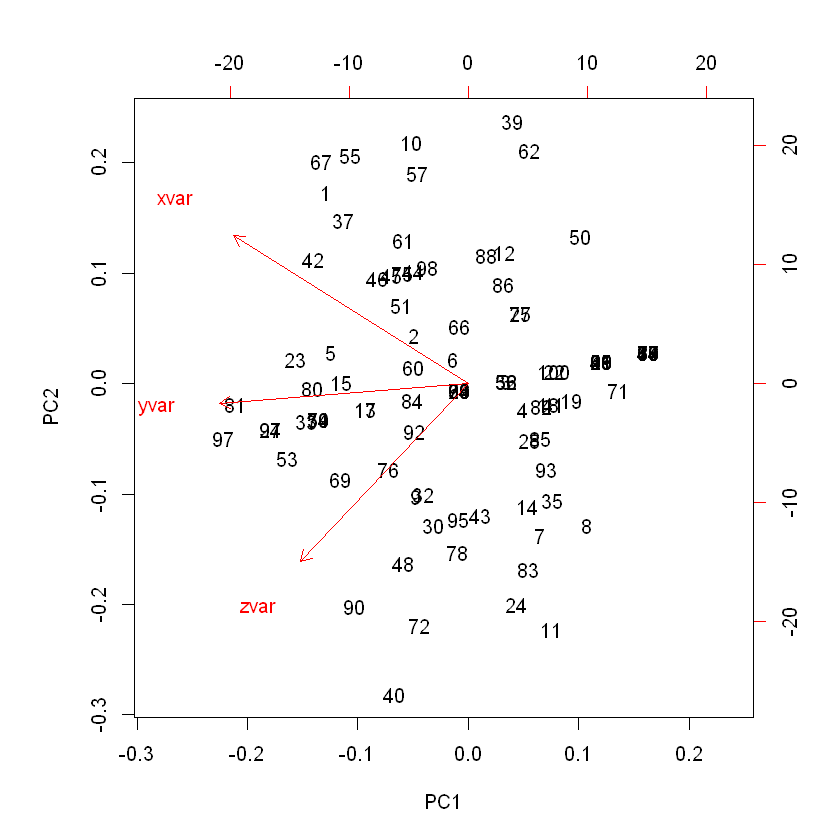

In [38]:
biplot(my.pca)

Fig. 8.4. A biplot() of a PCA solution for the simple, constructed example,
showing data points plotted on the first two components.